# Graded Lab Assignment: Logistic Regression

In this assignment you will classify hand-written digits using logistic regression.

The assignment follows Andrew Ng's explanation of Logistic Regression and (re)watching his videos could be useful (Week 3)

Publish your notebook (ipynb file) to your Machine Learning repository on Github ON TIME. We will check the last commit on the day of the deadline. 

### Deadline Tuesday, October 10th, 23:59

Do not hand in any other files, the Notebook should contain all your answers.

The points for the assignmnet are distributed as follows:
* The implementation
    - prediction_function (0.5)
    - cost_function (1)
    - compute_gradient (1)
    - correct stop condition (2)
    - preventing overfitting (0.5)
    - systematically choosing learning rate (1) 
    - best score analysis (1)
    - summary (1)
    - comments (0.5)
    - code (0.5)
    

In [389]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


Scikit-learn is a toolkit that has several datasets built in. You first need to install the toolkit: http://scikit-learn.org/stable/install.html

The MNIST dataset that you will be using for this assignment contains images of hand-written digits that are only 8 by 8 pixels, which means the algorithm (logistic regression) should run on every computer.

The code in the cell below shows how to work with the digits dataset and  how to visualize it. As you can see the numbers are not very clear in 8x8 pixels images, this means we cannot expect our logistic regression will have a very high classification score.

The numbers shown are: 
 [[0 1 2 3 4]
 [5 6 7 8 9]]


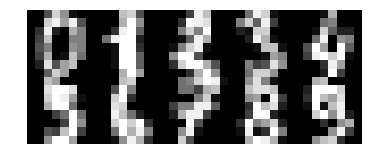

In [390]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=10)

#Create two rows with numbers
firstrow = np.hstack(digits.images[:5,:,:])
secondrow = np.hstack(digits.images[5:10,:,:])

plt.gray()
plt.axis('off')

#Show both rows at the same time
plt.imshow(np.vstack((firstrow,secondrow)))

print ("The numbers shown are: \n", np.vstack((digits.target[:5], digits.target[5:10])))

## The implementation

You have to implement the next three functions and fill in the body of the loop in order to create a correct implementation of logistic regression. Don't change the definitions of the functions and input parameters.

(1) Make sure that you do not overfit by keeping track of the score on the test set and implementing a correct stop condition. (2) Systematically pick a learning rate alpha that makes sure the algorithm learns in a smooth and stable manner (show how you do it). 
(3) Plot how your score on the test set improves over time. My best score was about 85% correct! 
(4) Write a short summary of what you have done (and why) to accomplish steps (1), (2) and (3). 
(5) Make sure to comment your code!

In [391]:
# helper function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [392]:
#Make a prediction function h
def prediction_function(x,theta):
    x_predict = sigmoid(np.dot(x,theta))
    return x_predict

In [482]:
#Use the output of hypothesis function to compute the cost function J (vectorised):
def cost_function(x_predict,y):        
    m = len(y)
    
    #first half of formula 
    first = np.dot((-y).T, np.log(x_predict))
    
    #second half
    second = np.dot((1-y).T, np.log(1-x_predict))
    
    #summation and division by length of vector y
    cost = (first - second)/m 
    return cost

In [483]:
#Create a function that returns the gradient values, given h (x_predict), y and x (vectorised):
def compute_gradient(x_predict, y, x):
    
    #dot behaves the same way as multiply
    grads = np.dot(x.T, x_predict - y)/size(x) 
    return grads

#just checking the shape of grads matrix here
compute_gradient(x_predict.reshape(1,10), y, x[1, :].reshape(1,64)).shape

(64, 10)

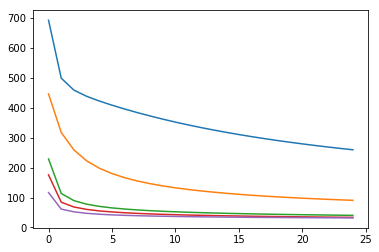

In [500]:
#It is important to check that you're not overfitting by testing your prediction on a testset
x = np.reshape(digits.images[:1500],(1500,64))
x_test = np.reshape(digits.images[1500:],(297,64))

target = digits.target[:1500]
target_test = digits.target[1500:]

def training(alpha, iterations):
    theta = np.zeros((64,10))

    # matrix of all costs after n0 of iterations
    cost_iterations = np.zeros(iterations)
    for i in range(iterations):

        #cumulatively add the cost after each of the 1500 iterations
        cost = 0
        for j in range(x.shape[0]):

            ## given
            y = np.zeros(10)
            y[target[j]] = 1
            x_predict = prediction_function(x[j,:].T,theta)
            ##

            cost += cost_function(x_predict, y)

            #compute gradient with x_predict and x[j] transformed to 2-D matrix
            grads = compute_gradient(x_predict.reshape(1,10), y, x[j,:].reshape(1,64))

            #update theta
            theta = theta - alpha*grads
        cost_iterations[i]= cost 

    #transform interations into 1-D array with values from 1 to 25
    plt.plot(np.arange(iterations), cost_iterations)
    return theta

alpha1 = training(0.0001, 25)
alpha2 = training(0.001, 25)
alpha3 = training(0.01, 25)
alpha4 = training(0.02, 25)
alpha5 = training(0.1, 25) #best

87.87878787878788
88.21548821548821
87.54208754208754
87.54208754208754
82.82828282828282
83.16498316498317


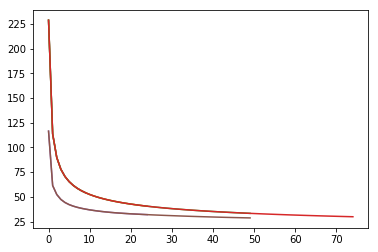

In [501]:
#apply on test set
def test_set(alpha, iters):
    theta = training(alpha, iters)
    score = 0
    for j in range(x_test.shape[0]):
        y=np.zeros(10)
        y[target_test[j]]= 1
        x_predict = prediction_function(x_test[j, :].T, theta)
        max_pred_ind = np.argmax(x_predict) #argmax gets the index of maximum in an nparray
        if max_pred_ind == target_test[j]:
            score += 1
    accuracy = score/x_test.shape[0] * 100
    print(accuracy)

test1 = test_set(0.01, 10)
test2 = test_set(0.01, 25)
test3 = test_set(0.01, 50)
test4 = test_set(0.01, 75)
test5 = test_set(0.1, 25)
test6 = test_set(0.1, 50)

## Summary

In order to choose the best alpha, I looked at the plot of the cost function against the number of iterations (25). I tested my training-set algorithm on 5 different values of alpha, ranging from 0.0001 to 0.1, with 0.1 generating the lowest cost function. Yet, 0.01 turns out to be a better alpha for the test set. After testing this on a test set (x_test), it was found that the overfitting was not a problem. Hence I did not have to use a regularization parameter and modify my cost function.

On the test set, it was seen that the number of iterations that produced the best theta and hence best accuracy was 25 (>88%).

The cells below are just me checking the shape and the behaviour of the functions.


In [502]:
x = np.reshape(digits.images[:1500],(1500,64))
len(x)

1500

In [503]:
#checking behavior of hypothesis function
prediction_function(x[1], theta)

array([  4.19644511e-14,   9.99999964e-01,   6.90705561e-08,
         1.60770474e-11,   8.87208065e-05,   1.30322951e-06,
         1.42291854e-09,   3.57435750e-07,   4.19552993e-02,
         4.61607686e-12])

In [504]:
#check cost function
cost_function(prediction_function(x[1400,:].T, theta), y)

0.0024485781165875802

In [505]:
print(target.shape)

(1500,)


In [506]:
#check behavior of argmax
print(argmax(y))

2


[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -2.36933412e-02  -5.26574852e-02   2.33036645e-02   1.71381885e-02
   -5.04970420e-03   4.92729727e-02  -1.84663685e-02  -1.47640784e-01
   -2.38923259e-02  -3.85348301e-02]
 [ -7.57020032e-02  -3.99155175e-02   3.34480960e-02  -2.55494279e-01
   -2.45362986e-01   3.15314823e-01  -1.91684418e-01  -8.13366430e-02
   -3.29933773e-02  -4.98078886e-03]
 [  4.62149121e-02   8.35877298e-02  -1.74871628e-02  -1.16836000e-02
   -2.55630159e-01  -3.20076129e-01  -7.54623142e-02  -5.97336422e-02
   -4.25238289e-01   2.45487492e-02]
 [ -1.20814838e-01  -5.53733379e-01  -7.68532465e-03   1.85679779e-01
   -2.85026553e-02   5.02931810e-02  -1.23950746e-01  -3.68625078e-03
   -1.08301792e-01  -2.92031214e-01]
 [ -1.80897073e-01   3.75689933e-01  -1.74362134e-01  -1.19941818e-02
   -2.76057585e-01   3.02706545e-01  -5.78601

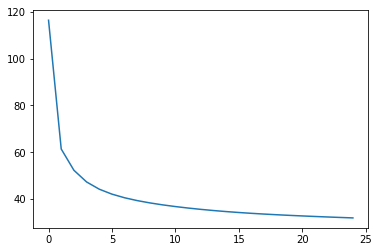

In [507]:
#check an example theta
theta = training(0.1, 25)
print(theta)